# Assignment 2
### Jett R
### 4/9/2024

In [1]:
import geopandas as gpd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
wildfire = gpd.read_file("C:/Users/jettr/Dropbox (University of Oregon)/23-24/Spring/Geog 490/Assignment 2/data/oregon_fires.shp")

## Task 1

In [3]:
wildfire.head()

,year,name,geometry
0,1961,tiller,"POLYGON ((503086.248 4754725.701, 503086.249 4..."
1,2017,boardman ave,"POLYGON ((755119.123 5081273.978, 755119.163 5..."
2,2010,warm springs,"POLYGON ((896857.988 4874242.600, 896858.005 4..."
3,2010,south ironside,"POLYGON ((886566.810 4908451.984, 886566.828 4..."
4,2010,sunday,"POLYGON ((929158.456 4936011.408, 929158.473 4..."


In [4]:
wildfire.dtypes

year           int64
name          object
geometry    geometry
dtype: object

### a. How many rows and columns?

In [5]:
RandC = wildfire.shape
print('Rows and Columns : ' + str(RandC))

Rows and Columns : (6770, 3)


In [6]:
wildfire.columns

Index(['year', 'name', 'geometry'], dtype='object')

### b. How many fires burned in 2021?

In [7]:
Year21 = wildfire[wildfire['year'] == 2021]
print('How many Fires burned in 2021? '+ str(len(Year21)))

How many Fires burned in 2021? 265


### c. Reproject the dataset to UTM Zone 10N (EPSG:32610) and make a new column called area that contains the area of each wildfire.

In [8]:
wildfire_utm = wildfire.to_crs(epsg=32610)

wildfire_utm['area'] = wildfire_utm.geometry.area

print(wildfire_utm.head())

   year            name                                           geometry  \
0  1961          tiller  POLYGON ((503086.248 4754725.701, 503086.249 4...   
1  2017    boardman ave  POLYGON ((755119.123 5081273.978, 755119.163 5...   
2  2010    warm springs  POLYGON ((896857.988 4874242.600, 896858.005 4...   
3  2010  south ironside  POLYGON ((886566.810 4908451.984, 886566.828 4...   
4  2010          sunday  POLYGON ((929158.456 4936011.408, 929158.473 4...   

       area  
0  0.017051  
1  0.019024  
2  0.031369  
3  0.031381  
4  0.031410  


### d. What are the names and years of the top 5 largest wildfires?

In [10]:
# Instead of searching all 6000+ rows, we can sort them from largest to smallest, then select the top 5 rows

wildfire_sorted = wildfire_utm.sort_values(by='area', ascending=False)
largest_wildfires = wildfire_sorted.head(5)

print("Names and years of the 5 largest wildfires:")
print(largest_wildfires[['name', 'year', 'area']])

Names and years of the 5 largest wildfires:
             name  year          area
6769    long draw  2012  2.267397e+09
6768      biscuit  2002  2.023472e+09
6767     holloway  2012  1.871568e+09
6766      bootleg  2021  1.673948e+09
6765  saddle draw  2014  1.137893e+09


### e. What is the area burned in 2021, km^2?

In [11]:
Year21 = wildfire_utm[wildfire_utm['year'] == 2021]
AreaBurnedMETERS = Year21['area'].sum()
AreaBurnedKM = AreaBurnedMETERS / 1000
print('Total Area Burned in 2021 (km^2) : ' + str(AreaBurnedKM))

Total Area Burned in 2021 (km^2) : 4254622.535332134


## Task 2

In [12]:
SpottedOwls = gpd.read_file("C:/Users/jettr/Dropbox (University of Oregon)/23-24/Spring/Geog 490/Assignment 2/data/spotted_owls.shp")

### a. How Many rows and Columns are there?

In [13]:
rowscols = SpottedOwls.shape
print('File has shape (rows, cols) : ' + str(rowscols))

File has shape (rows, cols) : (1821, 3)


### b. What are the min and max values in the males and females column?

In [14]:
print(SpottedOwls)

MaxMales = SpottedOwls['males'].max()
print('Max in Males Column : ' + str(MaxMales))
MinMales = SpottedOwls['males'].min()
print('Min in Males Column : ' + str(MinMales))

MaxFemales = SpottedOwls['females'].max()
print('Max in Females Column : ' + str(MaxFemales))
MinFemales = SpottedOwls['females'].min()
print('Min in Females Column : ' + str(MinFemales))

      males  females                     geometry
0       1.0      1.0  POINT (-123.36946 43.84928)
1       1.0      0.0  POINT (-123.38553 45.35914)
2       1.0      0.0  POINT (-123.38924 45.36038)
3       1.0      1.0  POINT (-122.29425 42.05855)
4       1.0      1.0  POINT (-123.40914 43.83023)
...     ...      ...                          ...
1816    1.0      1.0  POINT (-123.54294 44.26977)
1817    1.0      1.0  POINT (-123.12963 43.61792)
1818    1.0      1.0  POINT (-123.24714 43.77200)
1819    1.0      1.0  POINT (-123.56896 42.69225)
1820    1.0      1.0  POINT (-123.93200 42.94069)

[1821 rows x 3 columns]
Max in Males Column : 1.0
Min in Males Column : 0.0
Max in Females Column : 1.0
Min in Females Column : 0.0


### c. What Percentrage of locations have female spotted owls?

In [15]:
AllLocations = len(SpottedOwls)
FemaleOwlLocations = len(SpottedOwls[SpottedOwls['females'] == 1.0])

PercFemLoc = FemaleOwlLocations/AllLocations * 100
print('The Percentage of locations that have female Spotted owls : ' + str(PercFemLoc) + ' %')

The Percentage of locations that have female Spotted owls : 82.8665568369028 %


### d. What is the furthest East that spotted owls have been identified?

In [16]:
Owls_sorted = SpottedOwls.sort_values(by='geometry', ascending=False) # Sorts Lat and Lon at the same time
Furthest_East = Owls_sorted.head(5)
print(Furthest_East) 

      males  females                     geometry
1427    1.0      1.0  POINT (-122.11358 42.22016)
1286    1.0      0.0  POINT (-122.16723 42.04542)
1287    1.0      1.0  POINT (-122.15810 42.04934)
1285    1.0      1.0  POINT (-122.15254 42.05287)
1719    1.0      1.0  POINT (-122.19170 42.05394)


### e. Reproject the dataset to UTM Zone 10N (EPSG:32610).
### Make a new column called pairs which has a value of 1 if there are both male and female owls in that location.


In [70]:
SpottedOwls_utm = SpottedOwls.to_crs(epsg=32610)

# Create and initialize column 'pairs'
SpottedOwls_utm['pairs'] = 0

# Set the value to 1 where both 'males' and 'females' are equal to 1.0
SpottedOwls_utm.loc[(SpottedOwls['males'] == 1.0) & (SpottedOwls['females'] == 1.0), 'pairs'] = 1

print(SpottedOwls_utm)

      males  females                        geometry  pairs
0       1.0      1.0  POINT (470303.870 4855199.056)      1
1       1.0      0.0  POINT (469805.124 5022919.501)      0
2       1.0      0.0  POINT (469515.128 5023059.499)      0
3       1.0      1.0  POINT (558395.071 4656517.664)      1
4       1.0      1.0  POINT (467103.826 4853099.018)      1
...     ...      ...                             ...    ...
1816    1.0      1.0  POINT (456668.244 4901979.778)      1
1817    1.0      1.0  POINT (489540.427 4829445.475)      1
1818    1.0      1.0  POINT (480109.937 4846579.835)      1
1819    1.0      1.0  POINT (453394.406 4726797.099)      1
1820    1.0      1.0  POINT (423960.816 4754649.512)      1

[1821 rows x 4 columns]


SpottedOwls_utm is now only pairs of owls. We took out lone males and females, who's pair may or may not have been affected by wildfires. So if we want to see how many pairs of owls were affected by wildfires, we have to rejoin the unpaired owls first.

## Task 3 

In [18]:
wildfire = gpd.read_file("C:/Users/jettr/Dropbox (University of Oregon)/23-24/Spring/Geog 490/Assignment 2/data/oregon_fires.shp")

SpottedOwls = gpd.read_file("C:/Users/jettr/Dropbox (University of Oregon)/23-24/Spring/Geog 490/Assignment 2/data/spotted_owls.shp")

wildfire_proj = wildfire.to_crs(epsg=32610)
spottedowls_proj = SpottedOwls.to_crs(epsg=32610) # they have to both be in the same projection

### a. How many owl pairs were affected by the wildfires?

In [71]:
# Merge the two GeoDataFrames based on a common attribute (e.g., 'name' or 'ID')
merged_data = gpd.sjoin(wildfire_proj, spottedowls_proj, how='right', predicate='intersects') # merge datasets
# how = 'right' means that all data from the right will be preserverd. So when we join these two, all the owls will be preserved and wildfires that
# do not associate with owls are dropped

# Drop rows with missing values (NaN)
merged_data = merged_data.dropna()

In [72]:
merged_data.head()

,index_left,year,name,males,females,geometry
3,6666.0,2014.0,oregon gulch,1.0,1.0,POINT (558395.071 4656517.664)
23,6701.0,2018.0,taylor creek,1.0,1.0,POINT (455504.343 4705876.760)
24,6633.0,2002.0,timbered rock,1.0,1.0,POINT (521794.943 4733527.381)
51,6760.0,2020.0,holiday farm,1.0,1.0,POINT (525797.610 4881533.161)
91,6760.0,2020.0,holiday farm,1.0,0.0,POINT (542155.104 4881498.840)


In [73]:
PairsOwlsGone = len(merged_data[ (merged_data['males'] == 0.0) | (merged_data['females'] == 0.0) ])

print('the amount of affected pairs of owls: ' + str(PairsOwlsGone))

the amount of affected pairs of owls: 31


### b. In which year were the most owl pairs affected?

In [74]:
PairsOwlsGone = merged_data[ (merged_data['males'] == 0.0) | (merged_data['females'] == 0.0) ]

In [75]:
WorstYear = PairsOwlsGone['year'].value_counts()
print(WorstYear)

year
2020.0    17
2013.0     4
2017.0     3
2002.0     2
2018.0     1
1987.0     1
1994.0     1
1910.0     1
1966.0     1
Name: count, dtype: int64


In [76]:
print('The Year that affected the most Owls was : 2020')

The Year that affected the most Owls was : 2020


### c. How Many Owl Pairs were affected in this year?

In [77]:
print('17 pairs of Owls were affected by Wildfires in 2020')

17 pairs of Owls were affected by Wildfires in 2020


### d. Provide the Name and Year of the ONE wildfire that affected the MOST OWLS

In [78]:
WildfireAffects = PairsOwlsGone[['name' , 'year']].value_counts().reset_index()
WORSTWILDFIRE = WildfireAffects.iloc[0]
print('The Wildfire that affected the most Owls')
print(WORSTWILDFIRE)


The Wildfire that affected the most Owls
name     archie creek
year           2020.0
count               6
Name: 0, dtype: object


### e. Plot the Locations of Owls and wildfire perimeters

In [79]:
from matplotlib.lines import Line2D

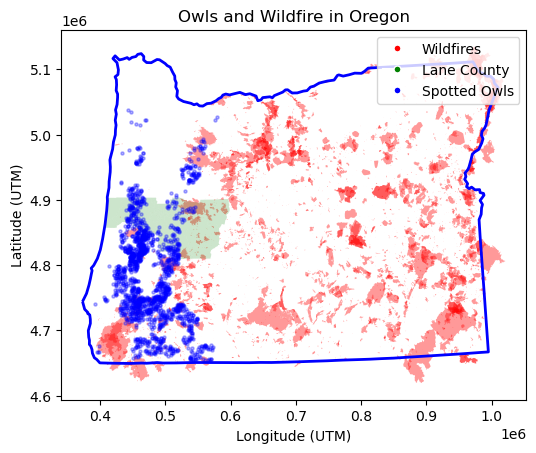

In [80]:
# Reprojecting A map of Oregon and getting the Boundary
states = gpd.read_file("C:/Users/jettr/Dropbox (University of Oregon)/23-24/Spring/Geog 490/Assignment 2/data/usa-states-census-2014.shp")
states = states.to_crs(epsg=32610)
oregon_boundary = states[states['NAME'] == 'Oregon'].boundary


# Because many of the files we have are shapefiles and we are using matplotlib to plot, it sees our objects/data as a bunch of 'patches' and doesn't know 
# How to handle the patches in the legend. So we have to define Handles for each layer that we want to have displayed in the legend.


# Reprojecting Lane County as a landmark 
lane = gpd.read_file("C:/Users/jettr/Dropbox (University of Oregon)/23-24/Spring/Geog 490/Activities/2_CensusTracts/data/data.shp")
lane_utm = lane.to_crs(epsg = 32610) 

# Reprojecting the Spotted Owls 
SpottedOwls = gpd.read_file("C:/Users/jettr/Dropbox (University of Oregon)/23-24/Spring/Geog 490/Assignment 2/data/spotted_owls.shp")
SpottedOwls_utm = SpottedOwls.to_crs(epsg = 32610)

# Plot Oregon boundary
ax = oregon_boundary.plot(figsize=(6, 6), color='blue', linewidth=2)

# Plot wildfires with solid red color
wildfire_handle = Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=5, label='Wildfires')
wildfire_utm.plot(ax=ax, color='red', markersize=5 , alpha = 0.4)

# Plot Lane County data
lane_handle = Line2D([0], [0], marker='o', color='w', markerfacecolor='green', markersize=5, label='Lane County')
lane_utm.plot(ax=ax, color='green', alpha=0.2)

# Plotting Owl Data
owl_handle = Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', markersize=5, label='Spotted Owls')
SpottedOwls_utm.plot(ax=ax , color = 'blue' , markersize = 5 , alpha = 0.3)

# Add legend handles and labels
legend_handles = [wildfire_handle, lane_handle, owl_handle]
legend_labels = [handle.get_label() for handle in legend_handles]

# Add x-label and y-label
plt.xlabel('Longitude (UTM)')
plt.ylabel('Latitude (UTM)')
plt.title('Owls and Wildfire in Oregon')

# Show legend
plt.legend(legend_handles, legend_labels)
plt.show()